In [1]:
""" fd3d_1_2.py: 1D FDTD
Simulation in free space
Absorbing Boundary Condition added
"""

import numpy as np
from math import exp
from matplotlib import pyplot as plt


In [2]:
ke = 200
ex = np.zeros(ke)
hy = np.zeros(ke)

# Pulse parameters
kc = int(ke / 2)
t0 = 40
spread = 12
boundary_low = [0, 0]
boundary_high = [0, 0]
nsteps = 250

# Dictionary to keep track of desired points for plotting
plotting_points = [
    {'num_steps': 100, 'data_to_plot': None, 'label': ''},
    {'num_steps': 225, 'data_to_plot': None, 'label': ''},
    {'num_steps': 250, 'data_to_plot': None, 'label': 'FDTD cells'}
]

# Main FDTD Loop
for time_step in range(1, nsteps + 1):
    # Calculate the Ex field
    for k in range(1, ke):
        ex[k] = ex[k] + 0.5 * (hy[k - 1] - hy[k])

    # Put a Gaussian pulse in the middle
    pulse = exp(-0.5 * ((t0 - time_step) / spread) ** 2)
    ex[kc] = pulse

    # Absorbing Boundary Conditions
    ex[0] = boundary_low.pop(0)
    boundary_low.append(ex[1])
    ex[ke - 1] = boundary_high.pop(0)
    boundary_high.append(ex[ke - 2])
    
    # Calculate the Hy field
    for k in range(ke - 1):
        hy[k] = hy[k] + 0.5 * (ex[k] - ex[k + 1])
        
    # Save data at certain points for later plotting
    for plotting_point in plotting_points:
        if time_step == plotting_point['num_steps']:
            plotting_point['data_to_plot'] = np.copy(ex)



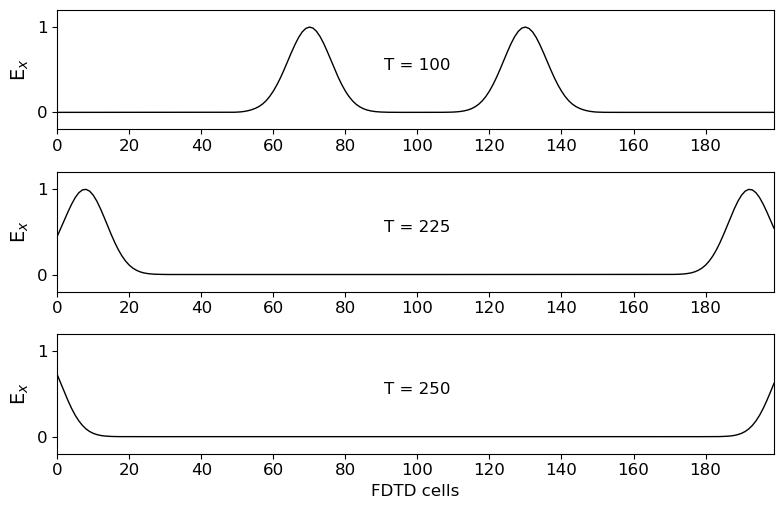

In [ ]:

plt.rcParams['font.size'] = 12
fig = plt.figure(figsize=(8, 5.25))

def plot_e_field(data, timestep, label):
    """Plot of E field at a single time step"""
    plt.plot(data, color='k', linewidth=1)
    plt.ylabel('E$_x$', fontsize='14')
    plt.xticks(np.arange(0, 199, step=20))
    plt.xlim(0, 199)
    plt.yticks(np.arange(0, 1.2, step=1))
    plt.ylim(-0.2, 1.2)
    plt.text(100, 0.5, 'T = {}'.format(timestep),
    horizontalalignment='center')
    plt.xlabel('{}'.format(label))

# Plot the E field at each of the time steps saved earlier
for subplot_num, plotting_point in enumerate(plotting_points):
    ax = fig.add_subplot(3, 1, subplot_num + 1)
    plot_e_field(
        plotting_point['data_to_plot'],
        plotting_point['num_steps'],
        plotting_point['label'],
    )
    
plt.tight_layout()
plt.show()